In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [15]:
#  Load dataset
df = pd.read_csv("Unemployment in India.csv")

In [16]:
#  Initial inspection
print(" First few rows:\n", df.head())
print("\n Dataset Info:")
print(df.info())

 First few rows:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [5]:
# --- Clean column names ---
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- Convert 'date' to datetime ---
df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-5-1765312026.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [6]:
#  Check for nulls
print("\n Missing values:\n", df.isnull().sum())

# Drop rows with missing unemployment rate
df = df.dropna(subset=['estimated_unemployment_rate_(%)'])

#  Create 'month' and 'year' columns
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.year



 Missing values:
 region                                     28
date                                       28
frequency                                  28
estimated_unemployment_rate_(%)            28
estimated_employed                         28
estimated_labour_participation_rate_(%)    28
area                                       28
dtype: int64


/tmp/ipython-input-6-1109961001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.to_period('M')
/tmp/ipython-input-6-1109961001.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


In [7]:
print("\n Descriptive statistics:")
print(df.describe())


 Descriptive statistics:
                                date  estimated_unemployment_rate_(%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       estimated_employed  estimated_labour_participation_rate_(%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06           

/tmp/ipython-input-8-1235860941.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


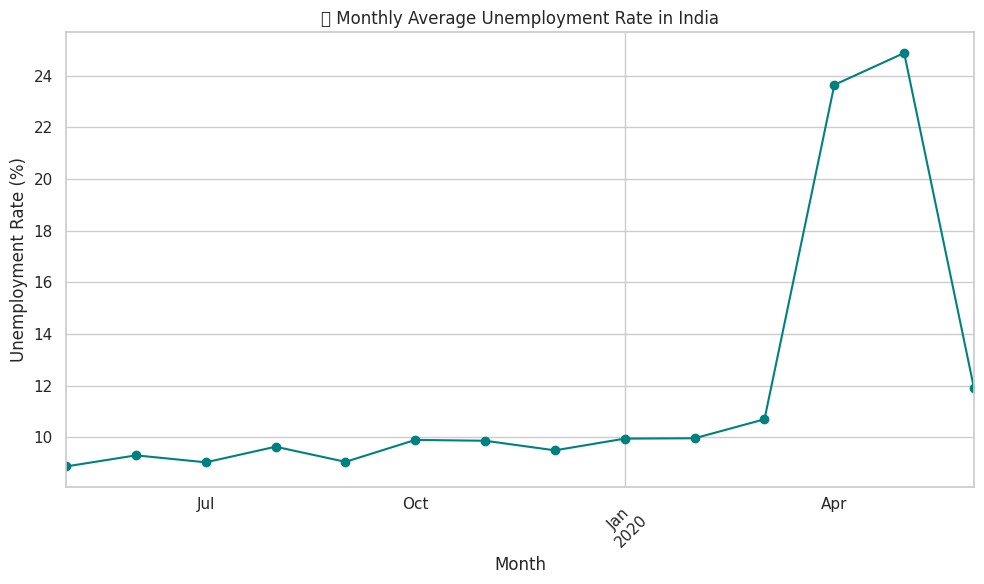

In [8]:
# 1. Monthly Unemployment Trend (India)
monthly_avg = df.groupby('month')['estimated_unemployment_rate_(%)'].mean()

plt.figure()
monthly_avg.plot(marker='o', color='teal')
plt.title(" Monthly Average Unemployment Rate in India")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

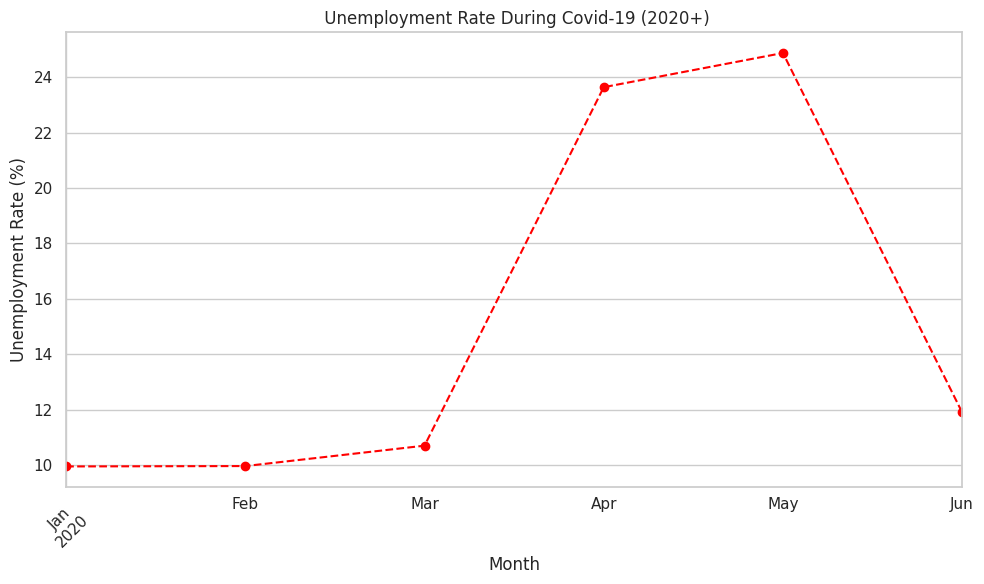

In [10]:
# 2. Covid-19 Impact (2020 onward)
covid_df = df[df['year'] >= 2020]
covid_trend = covid_df.groupby('month')['estimated_unemployment_rate_(%)'].mean()

plt.figure()
covid_trend.plot(marker='o', linestyle='--', color='red')
plt.title(" Unemployment Rate During Covid-19 (2020+)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
# Compare averages
pre_covid_avg = df[df['year'] < 2020]['estimated_unemployment_rate_(%)'].mean()
post_covid_avg = df[df['year'] >= 2020]['estimated_unemployment_rate_(%)'].mean()

print(f"\n Pre-Covid Avg Unemployment Rate: {pre_covid_avg:.2f}%")
print(f" Post-Covid Avg Unemployment Rate: {post_covid_avg:.2f}%")


 Pre-Covid Avg Unemployment Rate: 9.40%
 Post-Covid Avg Unemployment Rate: 15.10%


/tmp/ipython-input-12-3049291635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")


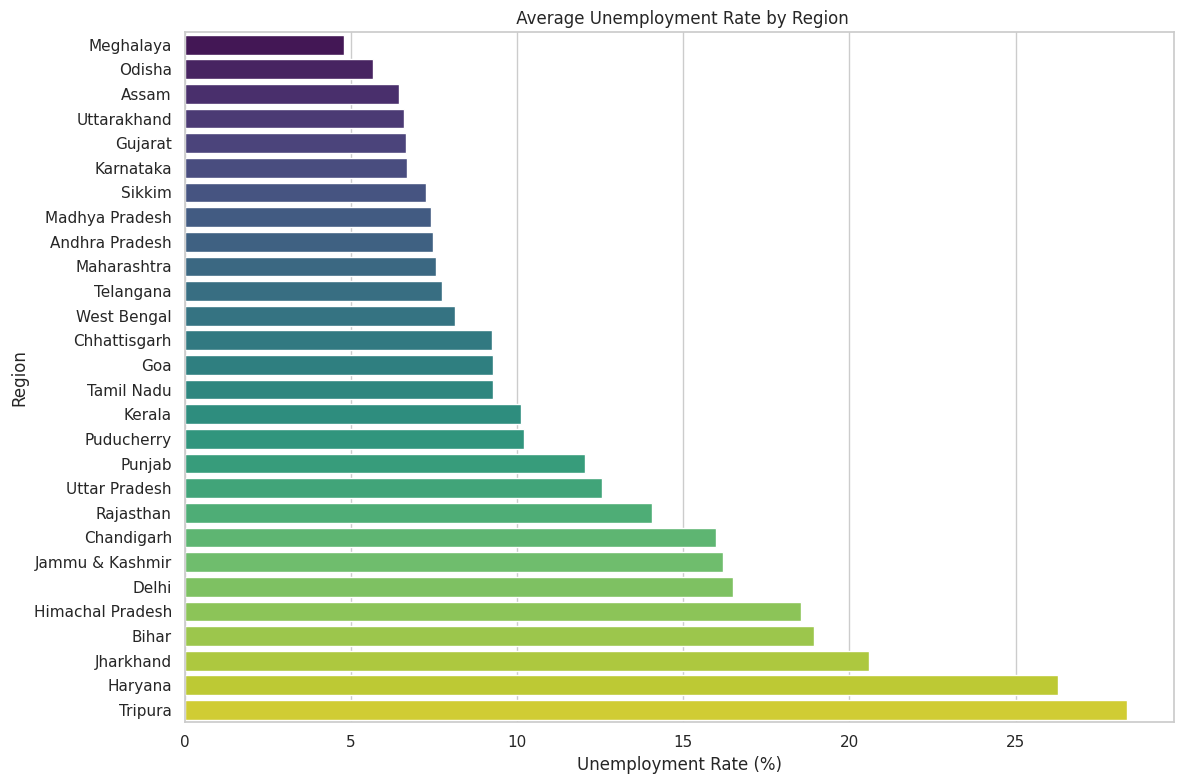

In [12]:
# 3. Region-wise Unemployment (Average)
region_avg = df.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
plt.title(" Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-3855694320.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


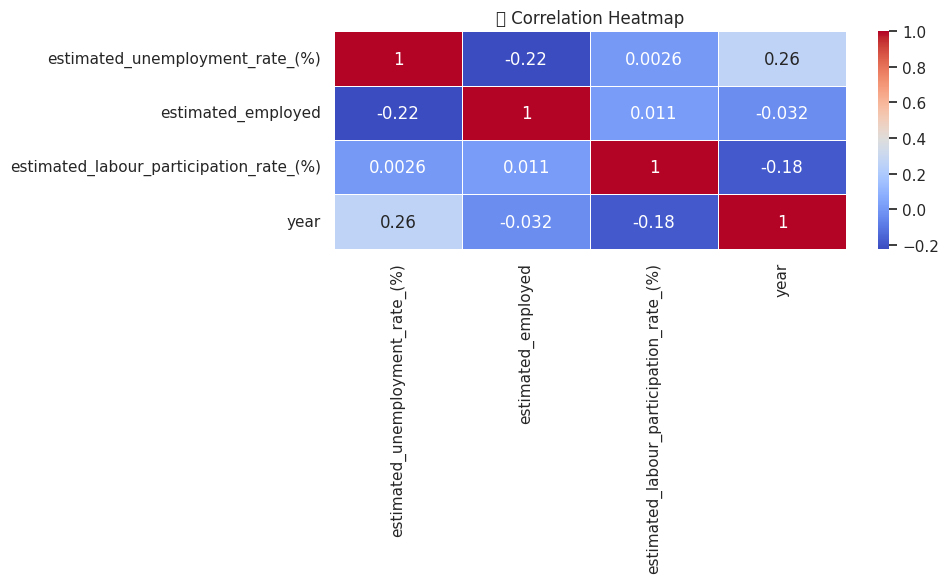

In [13]:
# 4. Correlation Heatmap

plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [14]:
# 5. Save Cleaned Data
df.to_csv("Cleaned_Unemployment_India.csv", index=False)
print("\n Cleaned data saved as 'Cleaned_Unemployment_India.csv'")


 Cleaned data saved as 'Cleaned_Unemployment_India.csv'
